In [1]:
import pandas as pd

In [23]:
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../File excel/data_summer2025.csv')

def convert_value(value):
    value = value.replace("€", "").lower()
    if "m" in value:
        return float(value.replace("m", "")) * 1_000_000
    elif "k" in value:
        return float(value.replace("k", "")) * 1_000
    elif "-" in value:
        return 0
    else:
        return float(value)
    # return value

df["market_value_clean"] = df["market_value"].apply(convert_value)

In [31]:
club_most_spend = df.groupby('club_to')['market_value_clean'].sum().sort_values(ascending=False).head(10)

<Axes: title={'center': 'Top 10 Club Most Spend in Transfer Market Summer 2025'}, xlabel='Total Spend (in Euro)', ylabel='Club Name'>

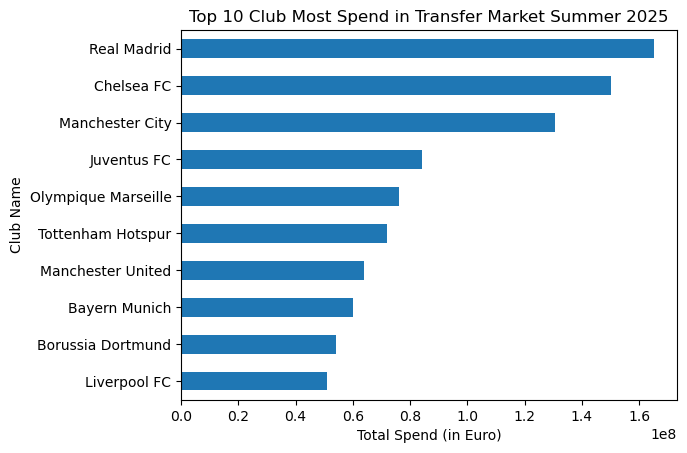

In [33]:
club_most_spend.sort_values().plot(kind='barh', title='Top 10 Club Most Spend in Transfer Market Summer 2025', xlabel='Total Spend (in Euro)', ylabel='Club Name')

In [35]:
club_most_earn = df.groupby('club_from')['market_value_clean'].sum().sort_values(ascending=False).head(10)

<Axes: title={'center': 'Top 10 Club Most Earn in Transfer Market Summer 2025'}, xlabel='Total Earn (in Euro)', ylabel='Club Name'>

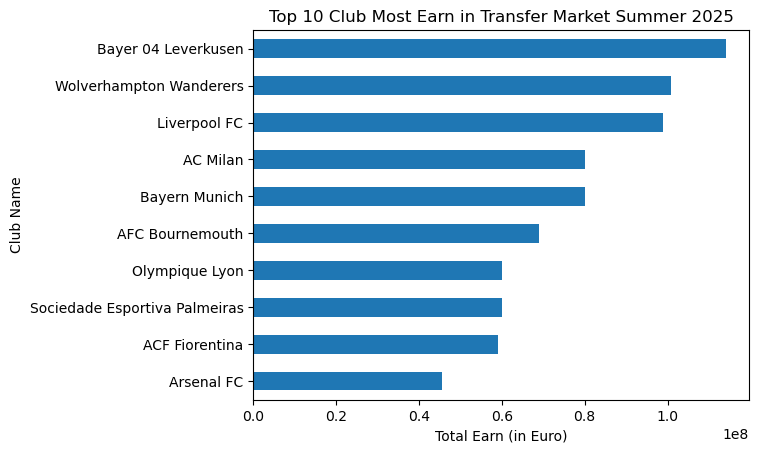

In [36]:
club_most_earn.sort_values().plot(kind='barh', title='Top 10 Club Most Earn in Transfer Market Summer 2025', xlabel='Total Earn (in Euro)', ylabel='Club Name')

In [ ]:
# df_big_leagues = df_transfer2025[df_transfer2025['league_from'].isin(top_5_league)]

In [7]:
df_pm_income = df[(df['league_from'] == 'Premier League') & (df['country_from'] == "England")].groupby('club_from')['market_value_clean'].sum().sort_values(ascending=False)

In [9]:
df_pm_outcome = df[(df['league_to'] == 'Premier League') & (df['country_to'] == "England")].groupby('club_to')['market_value_clean'].sum().sort_values(ascending=False)

<Axes: >

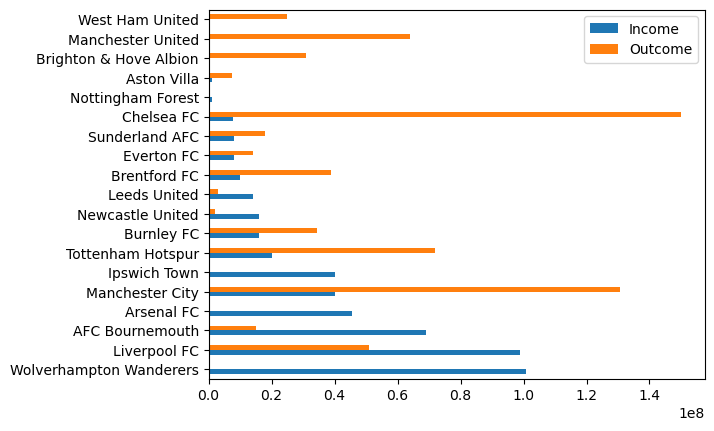

In [21]:
# gabungkan income & outcome ke 1 DataFrame
df_pm_summary = pd.DataFrame({
    "Income": df_pm_income,
    "Outcome": df_pm_outcome
}).fillna(0)  # kalau ada klub yang hanya income / outcome, isi 0

# urutkan berdasarkan Income atau Outcome (opsional)
df_pm_summary = df_pm_summary.sort_values("Income", ascending=False)

# df_pm_summary["Net"] = df_pm_summary["Income"] - df_pm_summary["Outcome"]

df_pm_summary.plot(kind='barh')


In [19]:
df_pm_summary

,Income,Outcome
Wolverhampton Wanderers,100900000.0,0.0
Liverpool FC,99000000.0,50800000.0
AFC Bournemouth,69000000.0,15000000.0
Arsenal FC,45500000.0,0.0
Manchester City,40000000.0,130600000.0
Ipswich Town,40000000.0,0.0
Tottenham Hotspur,20000000.0,72000000.0
Burnley FC,16000000.0,34500000.0
Newcastle United,16000000.0,2000000.0
Leeds United,14000000.0,3000000.0


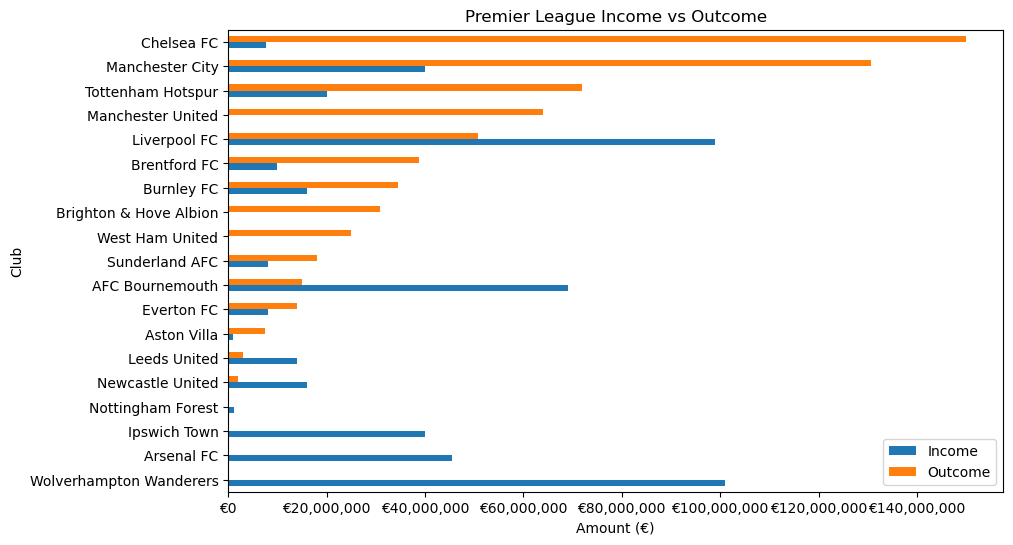

In [30]:
import matplotlib.ticker as mtick

ax = df_pm_summary.sort_values(by="Outcome").plot(kind="barh", figsize=(10,6))

# format axis X jadi Euro (tanpa desimal, pakai koma pemisah ribuan)
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('€{x:,.0f}'))

plt.title("Premier League Income vs Outcome")
plt.xlabel("Amount (€)")
plt.ylabel("Club")
plt.show()

In [54]:
top_5_leagues = [
    ("England", "Premier League"),
    ("Spain", "La Liga"),
    ("Italy", "Serie A"),
    ("Germany", "Bundesliga"),
    ("France", "Ligue 1")
]

# filter income
income = (
    df[df[['country_from','league_from']].apply(tuple, axis=1).isin(top_5_leagues)]
    .groupby(['country_from','league_from','club_from'])['market_value_clean']
    .sum()
)

# filter outcome
outcome = (
    df[df[['country_to','league_to']].apply(tuple, axis=1).isin(top_5_leagues)]
    .groupby(['country_to','league_to','club_to'])['market_value_clean']
    .sum()
)

df_summary = pd.concat([income, outcome], axis=1, keys=["Income","Outcome"]).fillna(0)
df_summary["Net"] = df_summary["Income"] - df_summary["Outcome"]
df_summary

Income     Outcome         Net
England Premier League AFC Bournemouth      69000000.0  15000000.0  54000000.0
                       Arsenal FC           45500000.0         0.0  45500000.0
                       Aston Villa           1000000.0   7500000.0  -6500000.0
                       Brentford FC         10000000.0  38800000.0 -28800000.0
                       Burnley FC           16000000.0  34500000.0 -18500000.0
...                                                ...         ...         ...
Germany Bundesliga     Eintracht Frankfurt         0.0  14000000.0 -14000000.0
                       Hamburger SV                0.0   7000000.0  -7000000.0
Italy   Serie A        Cagliari Calcio             0.0   4000000.0  -4000000.0
                       Parma Calcio 1913           0.0   7000000.0  -7000000.0
                       Torino FC                   0.0   3000000.0  -3000000.0

[70 rows x 3 columns]

In [63]:
# df_summary.reset_index(inplace=True)
df_summary = df_summary.rename(columns={'level_0': 'Country', 'level_1': 'League', 'level_2': 'Club'})

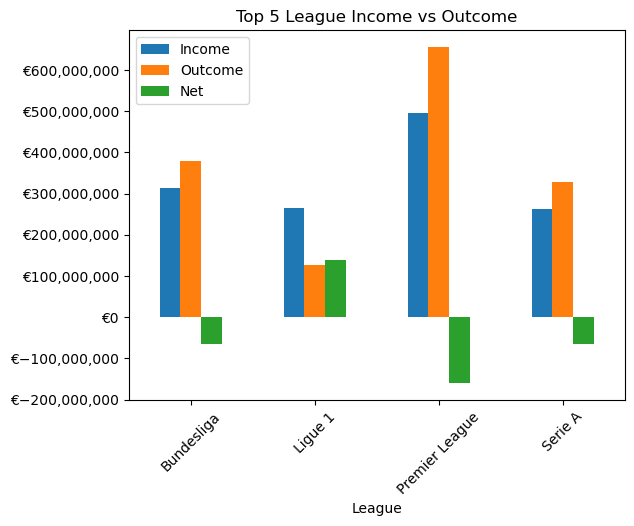

In [85]:
ay = df_summary.groupby('League')[['Income', 'Outcome', 'Net']].sum().plot(kind='bar')

# format axis X jadi Euro (tanpa desimal, pakai koma pemisah ribuan)
ay.yaxis.set_major_formatter(mtick.StrMethodFormatter('€{x:,.0f}'))
plt.title("Top 5 League Income vs Outcome")
plt.xlabel("League")
# plt.ylabel("Amount (€)")
plt.xticks(rotation=45)
plt.legend(loc='upper left')